In [28]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')  # 경고 메시지를 무시



In [29]:

# 시스템 환경에 따라 폰트를 자동으로 설정해주는 함수
def get_font_family():
    import platform
    system_name = platform.system()

    if system_name == "Darwin":
        return "AppleGothic"
    elif system_name == "Windows":
        return "Malgun Gothic"
    else:
        # Linux (Colab)
        !apt-get install fonts-nanum -qq > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        return "NanumBarunGothic"

# 한글 폰트 적용
plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

# 레티나 디스플레이 설정 (선명하게)
%config InlineBackend.figure_format = 'retina'



In [51]:


# CSV 또는 엑셀 불러오기
df = pd.read_csv("abc/빵과우울관계.csv", header=None)

# 상위 메타데이터 행 제거 (0~5행)
df = df.iloc[6:].reset_index(drop=True)

# 컬럼명 지정 (6행이 원래 컬럼명이므로 새로 지정)
df.columns = ['날짜_기존', '빵', '날짜', '우울']

# '날짜_기존' 컬럼은 불필요하므로 삭제 (원하면 유지 가능)
df = df.drop(columns=['날짜_기존'])

# 잘못 남은 '날짜' 같은 문자열 행 제거
df = df[df['날짜'] != '날짜']  # 혹시 아직 남아있다면 제거

# 타입 변환
df['날짜'] = pd.to_datetime(df['날짜'], errors='coerce')  # 안전하게 변환
df['빵'] = pd.to_numeric(df['빵'], errors='coerce')
df['우울'] = pd.to_numeric(df['우울'], errors='coerce')

# 혹시 날짜가 파싱되지 않은 행이 있다면 제거
df = df.dropna(subset=['날짜'])

# 인덱스 재정렬
df = df.reset_index(drop=True)

# 결과 확인
print(df.head())


          빵         날짜        우울
0  65.41353 2024-01-01  55.63909
1  65.41353 2024-01-02  42.85714
2  63.90977 2024-01-03  50.37593
3  60.90225 2024-01-04  43.60902
4  69.92481 2024-01-05  44.36090


In [31]:
# 컬럼명 지정
df.columns = ['빵', '날짜', '우울']

# 컬럼 순서 변경
df = df[['날짜', '빵', '우울']]

# 타입 변환
df['날짜'] = pd.to_datetime(df['날짜'], errors='coerce')
df['빵'] = pd.to_numeric(df['빵'], errors='coerce')
df['우울'] = pd.to_numeric(df['우울'], errors='coerce')

# 날짜 NaT 제거 (필요 시)
df = df.dropna(subset=['날짜'])

# 인덱스 재설정
df = df.reset_index(drop=True)

# 결과 확인
print(df.head())

          날짜         빵        우울
0 2024-01-01  65.41353  55.63909
1 2024-01-02  65.41353  42.85714
2 2024-01-03  63.90977  50.37593
3 2024-01-04  60.90225  43.60902
4 2024-01-05  69.92481  44.36090


In [36]:
corr_df = df[['빵', '우울']].corr(method='pearson')
print(corr_df)

           빵        우울
빵   1.000000 -0.032834
우울 -0.032834  1.000000


In [38]:
corr_value = df['빵'].corr(df['우울'])
print("빵과 우울의 상관계수:", corr_value)

빵과 우울의 상관계수: -0.032833711923424706


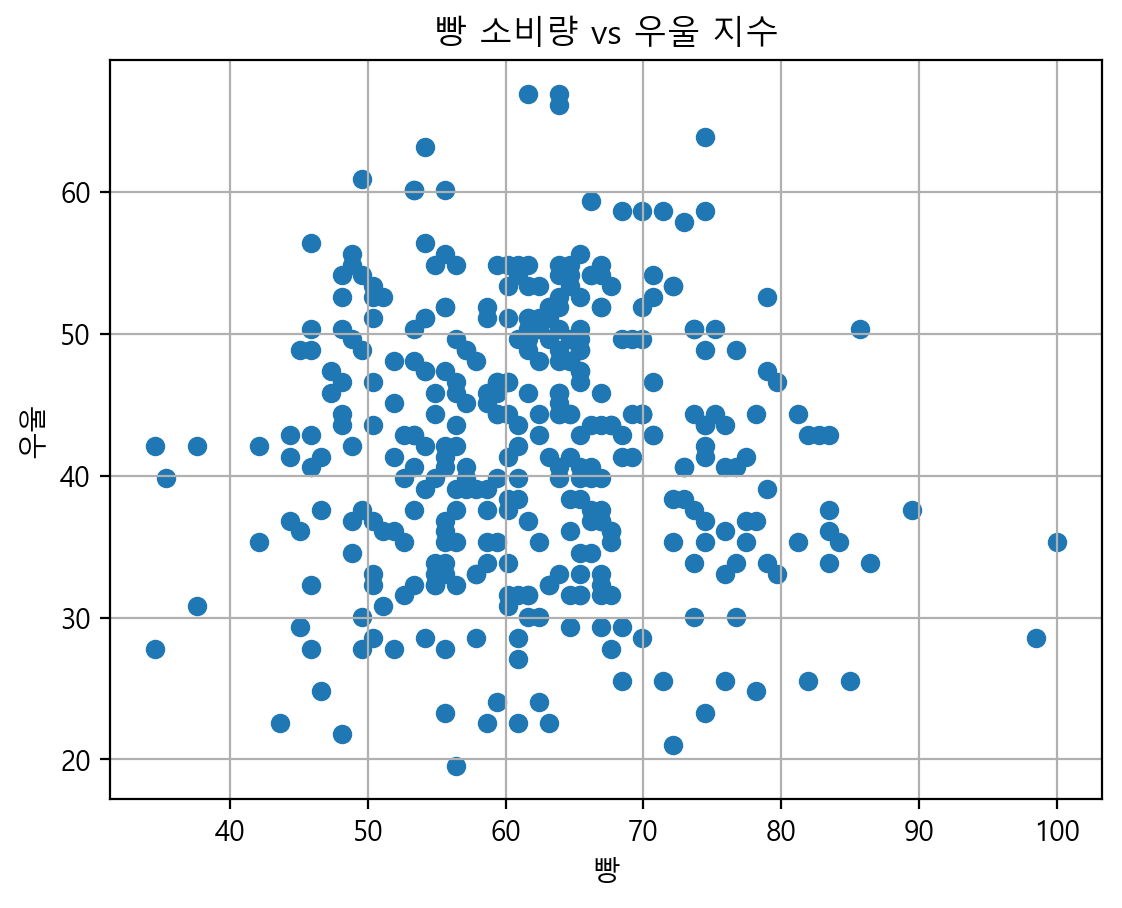

In [39]:
import matplotlib.pyplot as plt

plt.scatter(df['빵'], df['우울'])
plt.title('빵 소비량 vs 우울 지수')
plt.xlabel('빵')
plt.ylabel('우울')
plt.grid(True)
plt.show()


In [50]:
df = pd.read_csv("abc/불면증과스트레스.csv", header=None)
df.head(10)

,0,1,2,3
0,url,http://datalab.naver.com/keyword/trendResult.n...,NaN,NaN
1,주제,통검,NaN,NaN
2,범위,합계,NaN,NaN
3,기간,일간 : 2024-01-01 ~ 2024-12-31,NaN,NaN
4,성별,"전체(여성,남성)",NaN,NaN
5,연령대,"25~29, 30~34",NaN,NaN
6,날짜,불면증,날짜,스트레스
7,2024-01-01,15.8192,2024-01-01,44.06779
8,2024-01-02,16.94915,2024-01-02,49.43502
9,2024-01-03,18.07909,2024-01-03,100.0


In [43]:
# 상위 메타데이터 행 제거 (0~5행)
df = df.iloc[6:].reset_index(drop=True)

# 컬럼명 지정 (6행이 원래 컬럼명이므로 새로 지정)
df.columns = ['날짜_기존', '불면증', '날짜', '스트레스']

# '날짜_기존' 컬럼은 불필요하므로 삭제 (원하면 유지 가능)
df = df.drop(columns=['날짜_기존'])

# 잘못 남은 '날짜' 같은 문자열 행 제거
df = df[df['날짜'] != '날짜']  # 혹시 아직 남아있다면 제거

# 타입 변환
df['날짜'] = pd.to_datetime(df['날짜'], errors='coerce')  # 안전하게 변환
df['불면증'] = pd.to_numeric(df['불면증'], errors='coerce')
df['스트레스'] = pd.to_numeric(df['스트레스'], errors='coerce')

# 혹시 날짜가 파싱되지 않은 행이 있다면 제거
df = df.dropna(subset=['날짜'])

# 인덱스 재정렬
df = df.reset_index(drop=True)

# 결과 확인
print(df.head())

        불면증         날짜       스트레스
0  15.81920 2024-01-01   44.06779
1  16.94915 2024-01-02   49.43502
2  18.07909 2024-01-03  100.00000
3  17.51412 2024-01-04   50.84745
4  17.79661 2024-01-05   48.58757


In [44]:
corr_df = df[['불면증', '스트레스']].corr(method='pearson')
print(corr_df)

          불면증     스트레스
불면증   1.00000  0.60189
스트레스  0.60189  1.00000


In [45]:
corr_value = df['불면증'].corr(df['스트레스'])
print("불면증과 스트레스의 상관계수:", corr_value)

불면증과 스트레스의 상관계수: 0.601890133622267


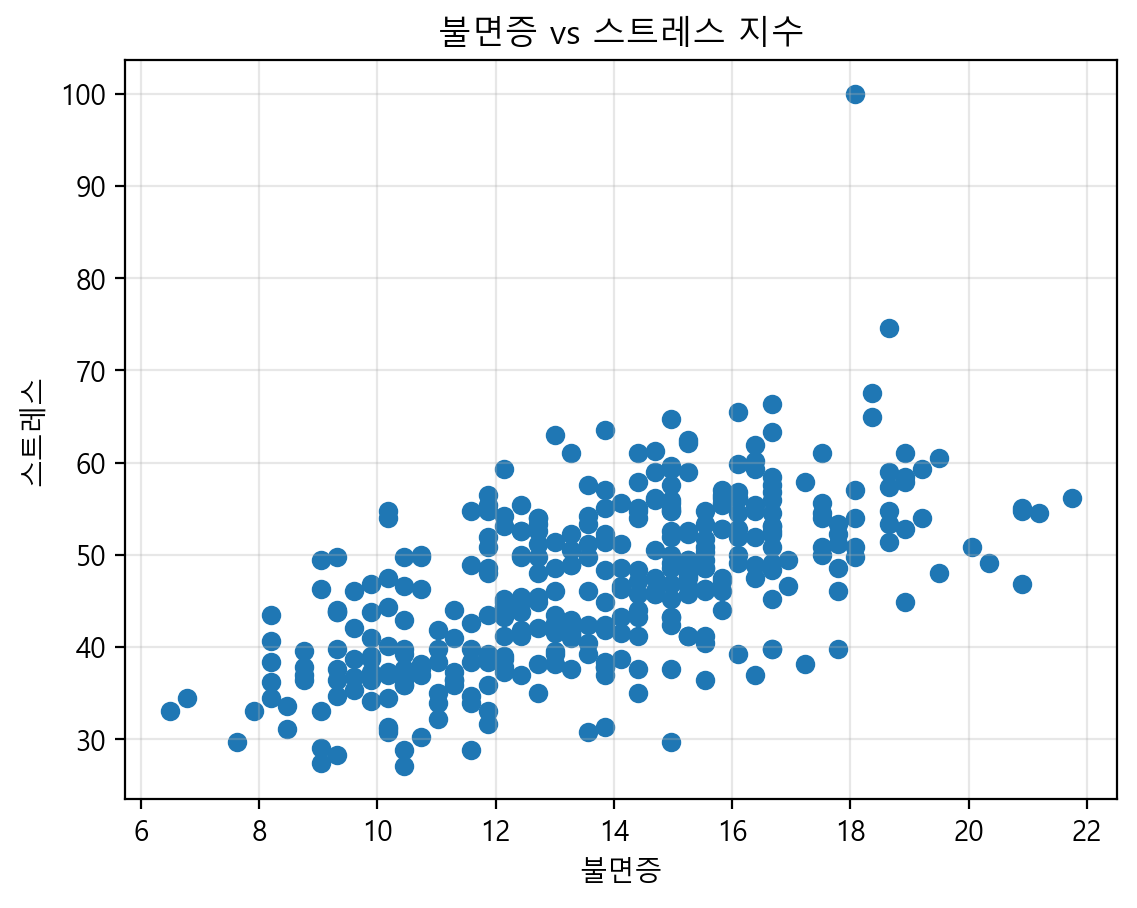

In [49]:
import matplotlib.pyplot as plt

plt.scatter(df['불면증'], df['스트레스'])
plt.title('불면증 vs 스트레스 지수')
plt.xlabel('불면증')
plt.ylabel('스트레스')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# 키와 몸무게 간의 관계 
# 예시 데이터
data = {
    'height': [160, 165, 170, 175, 180],
    'weight': [50, 55, 65, 70, 80]
}
df = pd.DataFrame(data)

# 피어슨 상관계수 계산
corr, p_value = pearsonr(df['height'], df['weight'])

print(f"피어슨 상관계수: {corr:.2f}")
print(f"p-값: {p_value:.4f}")


피어슨 상관계수: 0.99
p-값: 0.0006


In [ ]:
from scipy.stats import spearmanr

# 학생 성적 순위와 스포츠 성적 순위 간의 관계
# 데이터프레임 구성
data = {
    'student': ['A', 'B', 'C', 'D', 'E'],
    'academic_rank': [1, 2, 3, 4, 5],
    'sports_rank': [4, 2, 1, 3, 5]
}
df = pd.DataFrame(data)

# 스피어만 상관계수 계산
rho, pval = spearmanr(df['academic_rank'], df['sports_rank'])

print(f"스피어만 상관계수: {rho:.3f}")
print(f"p-value: {pval:.4f}")

스피어만 상관계수: 0.300
p-value: 0.6238


In [ ]:
import pandas as pd
from scipy.stats import kendalltau

# 사람 A~E의 키와 몸무게 순위
data = {
    'Person': ['A', 'B', 'C', 'D', 'E'],
    'Height_rank': [1, 2, 3, 4, 5],     # 키 순위
    'Weight_rank_1': [3, 4, 1, 2, 5],   # τ = 0.2
    'Weight_rank_2': [1, 2, 3, 4, 5],   # τ = 1
    'Weight_rank_3': [5, 4, 3, 2, 1]    # τ = -1
}

df = pd.DataFrame(data)

# 계수 계산
tau1, _ = kendalltau(df['Height_rank'], df['Weight_rank_1'])
tau2, _ = kendalltau(df['Height_rank'], df['Weight_rank_2'])
tau3, _ = kendalltau(df['Height_rank'], df['Weight_rank_3'])

print(f"상관계수 (Weight_rank_1): {tau1:.2f}")
print(f"상관계수 (Weight_rank_2): {tau2:.2f}")
print(f"상관계수 (Weight_rank_3): {tau3:.2f}")


상관계수 (Weight_rank_1): 0.20
상관계수 (Weight_rank_2): 1.00
상관계수 (Weight_rank_3): -1.00
